## Clustering top ten indian cities based on venues and analysing business scopes in each cities . 

<b>Business Problem:</b> The business opportunities in the top ten populated Indian cities.

<b>Introduction:</b> The current GDP growth rate of India is 7.4 percent, so it is great opportunity of investors to invest in India and leverage the potential of Indian people. In my project I would like to demonstrate the most categories of places in top ten Indian cities. This project will give analytical insight to the investors to invest in different businesses and will help understanding the choice of people in different cities.


<b>Data Collection Sources :</b>
i) Wikipedia
ii)www.mapsofindia.com
iii)Foursqure api

<b>Importind nesessery libraries</b>

In [14]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
#import folium # plotting library
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize



print('Libraries imported.')

Libraries imported.


#### Importing the dataset of names of all top 10 Cities in India

In [2]:
import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

df_data_city_names = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_city_names.head()



,City,States,Latitude,Longitude
0,Mumbai,Maharashtra,19.228825,72.854118
1,Delhi,Delhi,28.644800,77.216721
2,Bangalore,Karnataka,12.972442,77.580643
3,Hyderabad,Telangana,17.387140,78.491684
4,Ahmedabad,Gujarat,23.033863,72.585022


#### Importing dataset containing Latitude and longitude of postal codes

In [3]:

df_data_lat_lang = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_lat_lang = df_data_lat_lang[['key','latitude','longitude']]
df_data_lat_lang.head()
print(df_data_lat_lang.shape)
df_data_lat_lang['key'] = df_data_lat_lang['key'].map(lambda x: x.lstrip('IN/'))
df_data_lat_lang = df_data_lat_lang.rename(columns={'key': 'Pincode','latitude': 'Latitude','longitude': 'Longitude'})
df_data_lat_lang['Pincode'] = df_data_lat_lang['Pincode'].astype(int)
df_data_lat_lang.head()



(11042, 3)


,Pincode,Latitude,Longitude
0,110001,28.6333,77.2167
1,110002,28.6333,77.2500
2,110003,28.6500,77.2167
3,110004,28.6500,77.2167
4,110005,28.6500,77.2000


#### Importing Ahemdabad dataset and merging with df_data_lat_lang dataset

In [13]:

df_data_Ahemdabad = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Ahemdabad = df_data_Ahemdabad.rename(columns={'Pincode ': 'Pincode'})
df_data_Ahemdabad = df_data_Ahemdabad.merge(df_data_lat_lang, on='Pincode')
df_data_Ahemdabad.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
df_data_Ahemdabad.reset_index(inplace = True,drop=True)
print(df_data_Ahemdabad.shape)
df_data_Ahemdabad.head()



(47, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,Adroda,382220,Gujarat,Ahmedabad,22.8000,72.4500
1,Ahmedabad.,380001,Gujarat,Ahmedabad,30.2500,77.5833
2,Alau,382255,Gujarat,Ahmedabad,22.8000,72.4500
3,Ambawadi,380006,Gujarat,Ahmedabad,26.6667,75.1250
4,Ambawadi Vistar,380015,Gujarat,Ahmedabad,25.2042,73.6792


#### Importing Bangalore dataset and merging with df_data_lat_lang dataset

In [12]:

df_data_Bangalore = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Bangalore = df_data_Bangalore.rename(columns={'Pincode ': 'Pincode'})
df_data_Bangalore = df_data_Bangalore.merge(df_data_lat_lang, on='Pincode')
df_data_Bangalore.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
df_data_Bangalore.reset_index(inplace = True,drop=True)
print(df_data_Bangalore.shape)
df_data_Bangalore.head()

(59, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,A F station yelahanka,560063,Karnataka,Bangalore,13.1075,77.6003
1,Adugodi,560030,Karnataka,Bangalore,13.0499,77.1594
2,Agram,560007,Karnataka,Bangalore,12.2667,76.6833
3,Anandnagar,560024,Karnataka,Bangalore,13.0499,77.1594
4,Arabic College,560045,Karnataka,Bangalore,13.0499,77.1594


#### Importing Chennai dataset and merging with df_data_lat_lang dataset

In [11]:

df_data_Chennai = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Chennai = df_data_Chennai.rename(columns={'Pincode ': 'Pincode'})
df_data_Chennai = df_data_Chennai.merge(df_data_lat_lang, on='Pincode')
df_data_Chennai.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
df_data_Delhi.reset_index(inplace = True,drop=True)
print(df_data_Chennai.shape)
df_data_Chennai.head()



(34, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,Abiramapuram,600018,Tamil Nadu,Chennai,13.0025,80.2061
6,Adyar,600020,Tamil Nadu,Chennai,13.0044,80.2583
12,Agaram,600082,Tamil Nadu,Chennai,13.1100,80.2333
16,Anna Road,600002,Tamil Nadu,Chennai,13.0656,80.2672
21,Arumbakkam,600106,Tamil Nadu,Chennai,12.9819,80.2406


#### Importing Delhi dataset and merging with df_data_lat_lang dataset

In [10]:

df_data_Delhi = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Delhi = df_data_Delhi.rename(columns={'Pincode ': 'Pincode'})
df_data_Delhi = df_data_Delhi.merge(df_data_lat_lang, on='Pincode')
df_data_Delhi.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
df_data_Delhi.reset_index(inplace = True,drop=True)
print(df_data_Delhi.shape)
df_data_Delhi.head()


(11, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,A.G.c.r.,110002,Delhi,Central Delhi,28.6333,77.2500
1,A.K.market,110055,Delhi,Central Delhi,28.6167,77.2167
2,Anand Parbat,110005,Delhi,Central Delhi,28.6500,77.2000
3,Baroda House,110001,Delhi,Central Delhi,28.6333,77.2167
4,Dada Ghosh bhawan,110008,Delhi,Central Delhi,28.6500,77.2167


#### Importing Hyderabad dataset and merging with df_data_lat_lang dataset

In [8]:

df_data_Hyderabad = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Hyderabad = df_data_Hyderabad.rename(columns={'Pincode ': 'Pincode'})
df_data_Hyderabad = df_data_Hyderabad.merge(df_data_lat_lang, on='Pincode')
df_data_Hyderabad.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
df_data_Hyderabad.reset_index(inplace = True,drop=True)
print(df_data_Hyderabad.shape)
df_data_Hyderabad.head()



(33, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,A.G.college,500030,Telangana,Hyderabad,15.9667,77.6667
1,A.Gs office,500004,Telangana,Hyderabad,16.7024,78.1036
2,A.Gs. staff quarters,500045,Telangana,Hyderabad,16.7024,78.1036
3,Administrative Buildings,500007,Telangana,Hyderabad,16.7024,78.1036
4,Afzalgunj,500012,Telangana,Hyderabad,17.4381,78.5406


#### Importing Jaipur dataset and merging with df_data_lat_lang dataset

In [9]:

df_data_Jaipur = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Jaipur = df_data_Jaipur.rename(columns={'Pincode ': 'Pincode'})
df_data_Jaipur = df_data_Jaipur.merge(df_data_lat_lang, on='Pincode')
df_data_Jaipur.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
df_data_Jaipur.reset_index(inplace = True,drop=True)
print(df_data_Jaipur.shape)
df_data_Jaipur.head()



(34, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,A C jobner,303329,Rajasthan,Jaipur,26.7389,75.4833
1,A.G.office,302005,Rajasthan,Jaipur,26.1748,74.8799
2,Ashoknagar,302001,Rajasthan,Jaipur,26.1748,74.8799
3,Achrol,303002,Rajasthan,Jaipur,26.7000,75.6000
4,Airport Sanganer,302011,Rajasthan,Jaipur,26.1748,74.8799


#### Importing Kolkata dataset and merging with df_data_lat_lang dataset

In [7]:

df_data_Kolkata = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Kolkata = df_data_Kolkata.rename(columns={'Pincode ': 'Pincode'})
df_data_Kolkata = df_data_Kolkata.merge(df_data_lat_lang, on='Pincode')
df_data_Kolkata.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
print(df_data_Kolkata.shape)
df_data_Kolkata.reset_index(inplace = True,drop=True)
df_data_Kolkata.head()


(62, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,A.J.c.bose road,700020,West Bengal,Kolkata,22.569,88.3697
1,Abinash Chaowdhury lane,700046,West Bengal,Kolkata,22.569,88.3697
2,Alipore,700027,West Bengal,Kolkata,22.569,88.3697
3,Asylum Lane,700014,West Bengal,Kolkata,22.569,88.3697
4,Badartala,700044,West Bengal,Kolkata,22.569,88.3697


#### Importing Mumbai dataset and merging with df_data_lat_lang dataset

In [6]:

df_data_Mumbai = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Mumbai = df_data_Mumbai.rename(columns={'Pincode ': 'Pincode'})
df_data_Mumbai = df_data_Mumbai.merge(df_data_lat_lang, on='Pincode')
df_data_Mumbai.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True)
df_data_Mumbai.reset_index(inplace = True,drop=True)
print(df_data_Mumbai.shape)
df_data_Mumbai.head()



(59, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,A I staff colony,400029,Maharashtra,Mumbai,19.0167,72.85
1,Aareymilk Colony,400065,Maharashtra,Mumbai,19.0167,72.85
2,Agripada,400011,Maharashtra,Mumbai,19.0167,72.85
3,Airport,400099,Maharashtra,Mumbai,19.0167,72.85
4,Ambewadi,400004,Maharashtra,Mumbai,19.0167,72.85


#### Importing Pune dataset and merging with df_data_lat_lang dataset

In [5]:

df_data_Pune = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_Pune = df_data_Pune.rename(columns={'Pincode ': 'Pincode'})
df_data_Pune = df_data_Pune.merge(df_data_lat_lang, on='Pincode')
df_data_Pune.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True) 
df_data_Pune.reset_index(inplace = True,drop=True)
print(df_data_Pune.shape)
df_data_Pune.head()



(28, 6)


,Location,Pincode,State,District,Latitude,Longitude
0,Adhale Bk,410506,Maharashtra,Pune,18.7167,73.6833
1,Airport,411032,Maharashtra,Pune,18.1617,74.5404
2,Alandi Chorachi,412201,Maharashtra,Pune,18.4500,74.0333
3,Ambale,410507,Maharashtra,Pune,18.7167,73.6833
4,Ambavane,410401,Maharashtra,Pune,18.7500,73.4167


#### Importing Surat dataset and merging with df_data_lat_lang dataset

In [4]:

df_data_surat = pd.read_csv(body) # This is the notebook prepared in Watson Studio so the cerdentials are hidden
df_data_surat = df_data_surat.rename(columns={'Pincode ': 'Pincode'})
df_data_surat = df_data_surat.merge(df_data_lat_lang, on='Pincode')
df_data_surat.drop_duplicates(subset ="Pincode",keep = 'first', inplace = True) 
df_data_surat.reset_index(inplace = True,drop=True)
df_data_surat.head()



,Location,Pincode,State,District,Latitude,Longitude
0,Aganovad,395003,Gujarat,Surat,21.1667,72.8333
1,Ambheta,395005,Gujarat,Surat,21.1667,72.8333
2,Amchak,394250,Gujarat,Surat,20.9778,73.1000
3,Antroli,394325,Gujarat,Surat,21.4667,71.7722
4,Asnad,394540,Gujarat,Surat,21.3333,72.7500


#### Foursqure credentials

In [2]:
### Client ID
CLIENT_ID = 'My_client_id'
             # your Foursquare ID
CLIENT_SECRET = 'My_Client_Sectet'
             # your Foursquare Secret


#### Defining getnearbyVenues

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT = 1000
    radius = 50000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Getting Bangalore near by venues using foursqure API

In [17]:
Bangalore_venues = getNearbyVenues(names=df_data_Bangalore['Location'],
                                   latitudes=df_data_Bangalore['Latitude'],
                                   longitudes=df_data_Bangalore['Longitude']
                                  )

Bangalore_venues['City'] = 'Bangalore'

In [18]:
print(Bangalore_venues.shape)
Bangalore_venues.head()

(5228, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,A F station yelahanka,13.1075,77.6003,The Druid Garden,13.063946,77.591492,Brewery,Bangalore
1,A F station yelahanka,13.1075,77.6003,Decathlon,13.168697,77.632389,Bike Shop,Bangalore
2,A F station yelahanka,13.1075,77.6003,Kanti Sweets,13.093498,77.582429,Dessert Shop,Bangalore
3,A F station yelahanka,13.1075,77.6003,Orion Mall,13.011247,77.555009,Shopping Mall,Bangalore
4,A F station yelahanka,13.1075,77.6003,Ice N Spice by truffles,13.028079,77.573116,Burger Joint,Bangalore


#### Getting Hyderabad near by venues using foursqure API

In [19]:
Hyderabad_venues = getNearbyVenues(names=df_data_Hyderabad['Location'],
                                   latitudes=df_data_Hyderabad['Latitude'],
                                   longitudes=df_data_Hyderabad['Longitude']
                                  )
Hyderabad_venues['City'] = 'Hyderabad'

In [20]:
print(Hyderabad_venues.shape)
Hyderabad_venues.head()

(763, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,A.G.college,15.9667,77.6667,jyothi mall,15.826117,78.040175,Shopping Mall,Hyderabad
1,A.G.college,15.9667,77.6667,Dvr mansion,15.834129,78.041117,Indian Restaurant,Hyderabad
2,A.G.college,15.9667,77.6667,Raichur Railway Station,16.193046,77.339428,Train Station,Hyderabad
3,A.G.college,15.9667,77.6667,mantralaya bus stand,15.940495,77.424597,Bus Station,Hyderabad
4,A.G.college,15.9667,77.6667,Tungabhadra River,15.943412,77.422176,River,Hyderabad


#### Getting Loklata near by venues using foursqure API

In [21]:
Kolkata_venues = getNearbyVenues(names=df_data_Kolkata['Location'],
                                   latitudes=df_data_Kolkata['Latitude'],
                                   longitudes=df_data_Kolkata['Longitude']
                                  )
Kolkata_venues['City'] = 'Kolkata'

In [22]:
print(Kolkata_venues.shape)
Kolkata_venues.head()

(6200, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,A.J.c.bose road,22.569,88.3697,The Oberoi Grand,22.561749,88.351594,Hotel,Kolkata
1,A.J.c.bose road,22.569,88.3697,Eden Garden,22.564542,88.343296,Cricket Ground,Kolkata
2,A.J.c.bose road,22.569,88.3697,Peter Cat,22.552365,88.352544,Indian Restaurant,Kolkata
3,A.J.c.bose road,22.569,88.3697,Victoria Memorial,22.545844,88.342890,History Museum,Kolkata
4,A.J.c.bose road,22.569,88.3697,Hyatt Regency Kolkata,22.570358,88.405319,Hotel,Kolkata


#### Getting Delhi near by venues using foursqure API

In [23]:
Delhi_venues = getNearbyVenues(names=df_data_Delhi['Location'],
                                   latitudes=df_data_Delhi['Latitude'],
                                   longitudes=df_data_Delhi['Longitude']
                                  )
Delhi_venues['City'] = 'Delhi'

In [24]:
print(Delhi_venues.shape)
Delhi_venues.head()

(1100, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,A.G.c.r.,28.6333,77.25,The Imperial,28.625548,77.218664,Hotel,Delhi
1,A.G.c.r.,28.6333,77.25,Naturals Ice Cream,28.634455,77.222139,Ice Cream Shop,Delhi
2,A.G.c.r.,28.6333,77.25,Connaught Place | कनॉट प्लेस (Connaught Place),28.632731,77.220018,Plaza,Delhi
3,A.G.c.r.,28.6333,77.25,Humayun’s Tomb | हुमायूँ का मकबरा (Humayun’s T...,28.593197,77.246047,Monument / Landmark,Delhi
4,A.G.c.r.,28.6333,77.25,Tamra,28.620543,77.218174,Restaurant,Delhi


#### Getting Chennai near by venues using foursqure API

In [25]:
Chennai_venues = getNearbyVenues(names=df_data_Chennai['Location'],
                                   latitudes=df_data_Chennai['Latitude'],
                                   longitudes=df_data_Chennai['Longitude']
                                  )
Chennai_venues['City'] = 'Chennai'

In [26]:
print(Chennai_venues.shape)
Chennai_venues.head()

(3400, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,Abiramapuram,13.0025,80.2061,ITC Grand Chola,13.010440,80.220669,Hotel,Chennai
1,Abiramapuram,13.0025,80.2061,"Ottimo Cucina Italiana, ITC Grand Chola",13.010444,80.220938,Italian Restaurant,Chennai
2,Abiramapuram,13.0025,80.2061,Luxe Cinemas,12.991041,80.216962,Multiplex,Chennai
3,Abiramapuram,13.0025,80.2061,Park Hyatt Chennai,13.010554,80.223461,Hotel,Chennai
4,Abiramapuram,13.0025,80.2061,Phoenix Market City,12.991710,80.217297,Shopping Mall,Chennai


#### Getting Ahemdabad near by venues using foursqure API

In [27]:
Ahemdabad_venues = getNearbyVenues(names=df_data_Ahemdabad['Location'],
                                   latitudes=df_data_Ahemdabad['Latitude'],
                                   longitudes=df_data_Ahemdabad['Longitude']
                                  )
Ahemdabad_venues['City'] = 'Ahemdabad'

In [28]:
print(Ahemdabad_venues.shape)
Ahemdabad_venues.head()

(3176, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,Adroda,22.8,72.45,Gulmohar Greens Golf & Country Club,22.962651,72.430077,Golf Course,Ahemdabad
1,Adroda,22.8,72.45,K K tea stall,23.030198,72.540535,Tea Room,Ahemdabad
2,Adroda,22.8,72.45,Zencafe,23.027230,72.521841,Café,Ahemdabad
3,Adroda,22.8,72.45,TOMATO'S,23.026693,72.557488,Mexican Restaurant,Ahemdabad
4,Adroda,22.8,72.45,Melt In,23.038354,72.512597,Dessert Shop,Ahemdabad


#### Getting Jaipur near by venues using foursqure API

In [29]:
Jaipur_venues = getNearbyVenues(names=df_data_Jaipur['Location'],
                                   latitudes=df_data_Jaipur['Latitude'],
                                   longitudes=df_data_Jaipur['Longitude']
                                  )
Jaipur_venues['City'] = 'Jaipur'

In [30]:
print(Jaipur_venues.shape)
Jaipur_venues.head()

(1948, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,A C jobner,26.7389,75.4833,Rambagh Palace Hotel,26.897931,75.808390,Hotel,Jaipur
1,A C jobner,26.7389,75.4833,Tapri - The Tea House & Jizo,26.905663,75.811182,Tea Room,Jaipur
2,A C jobner,26.7389,75.4833,Moustache hostel,26.919589,75.797884,Hostel,Jaipur
3,A C jobner,26.7389,75.4833,Curious Life Coffee Roasters,26.904097,75.797121,Café,Jaipur
4,A C jobner,26.7389,75.4833,Peacock Rooftop,26.916347,75.795600,Indian Restaurant,Jaipur


#### Getting Mumbai near by venues using foursqure API

In [31]:
Mumbai_venues = getNearbyVenues(names=df_data_Mumbai['Location'],
                                   latitudes=df_data_Mumbai['Latitude'],
                                   longitudes=df_data_Mumbai['Longitude']
                                  )
Mumbai_venues['City'] = 'Mumbai'

In [32]:
print(Mumbai_venues.shape)
Mumbai_venues.head()

(5900, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,A I staff colony,19.0167,72.85,Café Madras,19.027721,72.855196,Café,Mumbai
1,A I staff colony,19.0167,72.85,Ram Ashraya,19.028092,72.851729,Vegetarian / Vegan Restaurant,Mumbai
2,A I staff colony,19.0167,72.85,Hard Rock Café Mumbai,19.007121,72.829258,American Restaurant,Mumbai
3,A I staff colony,19.0167,72.85,Café Zoe,19.000226,72.830252,Café,Mumbai
4,A I staff colony,19.0167,72.85,Shivaji Park,19.027150,72.838261,Playground,Mumbai


#### Getting Pune near by venues using foursqure API

In [33]:
Pune_venues = getNearbyVenues(names=df_data_Pune['Location'],
                                   latitudes=df_data_Pune['Latitude'],
                                   longitudes=df_data_Pune['Longitude']
                                  )
Pune_venues['City'] = 'Pune'

In [34]:
print(Pune_venues.shape)
Pune_venues.head()

(1527, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,Adhale Bk,18.7167,73.6833,Japalouppe Equestrian Horse Riding Centre,18.702341,73.695452,Farm,Pune
1,Adhale Bk,18.7167,73.6833,Bakers Hut,18.642342,73.773437,Bakery,Pune
2,Adhale Bk,18.7167,73.6833,Urban Foundry,18.569289,73.774725,Lounge,Pune
3,Adhale Bk,18.7167,73.6833,Sayaji,18.599535,73.754995,Hotel,Pune
4,Adhale Bk,18.7167,73.6833,Incognito,18.570376,73.774607,Italian Restaurant,Pune


#### Getting Surat near by venues using foursqure API

In [35]:
Surat_venues = getNearbyVenues(names=df_data_surat['Location'],
                                   latitudes=df_data_surat['Latitude'],
                                   longitudes=df_data_surat['Longitude']
                                  )
Surat_venues['City'] = 'Surat'

In [36]:
print(Surat_venues.shape)
Surat_venues.head()

(1902, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,Aganovad,21.1667,72.8333,A-One Coco,21.197061,72.821175,Ice Cream Shop,Surat
1,Aganovad,21.1667,72.8333,Subway,21.175533,72.809047,Sandwich Place,Surat
2,Aganovad,21.1667,72.8333,World Platter,21.174260,72.801921,Indian Restaurant,Surat
3,Aganovad,21.1667,72.8333,Mysore Cafe,21.184957,72.808547,Indian Restaurant,Surat
4,Aganovad,21.1667,72.8333,Golden Dragon,21.175125,72.804577,Chinese Restaurant,Surat


#### Getting bar chart which chows number of venues in Surat 

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

Surat_group_by = pd.DataFrame(Surat_venues['Venue Category'].value_counts()).reset_index()
Surat_group_by = Surat_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Surat_group_by,label="Total", color="b")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Surat")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Surat')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Surat')

#### Getting bar chart which chows number of venues in Delhi

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Delhi')

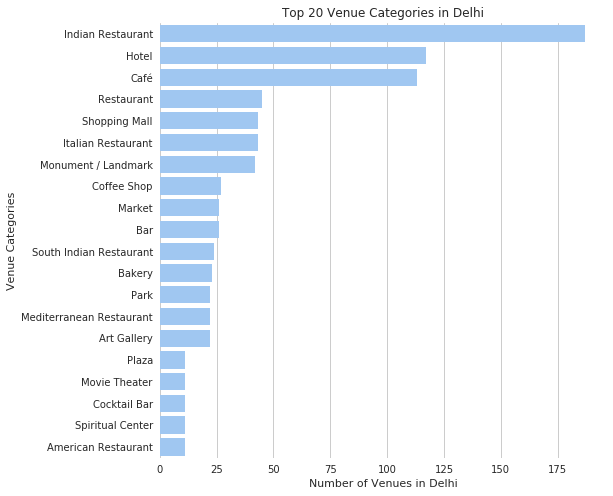

In [38]:
sns.set(style="whitegrid")

Delhi_group_by = pd.DataFrame(Delhi_venues['Venue Category'].value_counts()).reset_index()
Delhi_group_by = Delhi_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Delhi_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Delhi")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Delhi')

#### Getting bar chart which chows number of venues in Ahemdabad 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Ahemdabad')

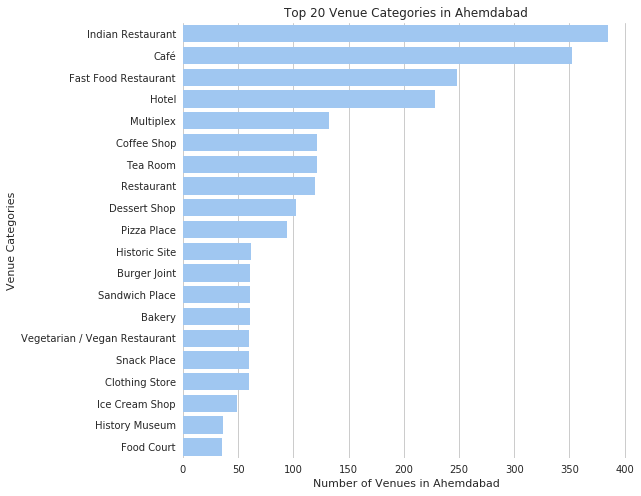

In [39]:
sns.set(style="whitegrid")

Ahemdabad_group_by = pd.DataFrame(Ahemdabad_venues['Venue Category'].value_counts()).reset_index()
Ahemdabad_group_by = Ahemdabad_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Ahemdabad_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Ahemdabad")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Ahemdabad')

#### Getting bar chart which chows number of venues in Bangalore

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Bangalore')

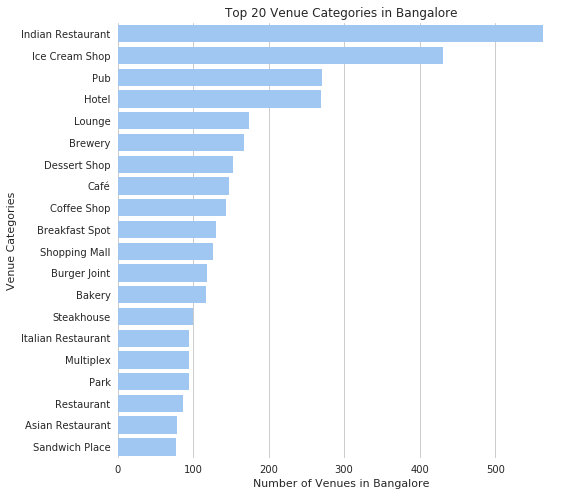

In [40]:
sns.set(style="whitegrid")

Bangalore_group_by = pd.DataFrame(Bangalore_venues['Venue Category'].value_counts()).reset_index()
Bangalore_group_by = Bangalore_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Bangalore_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Bangalore")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Bangalore')

#### Getting bar chart which chows number of venues in Chennai

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Chennai')

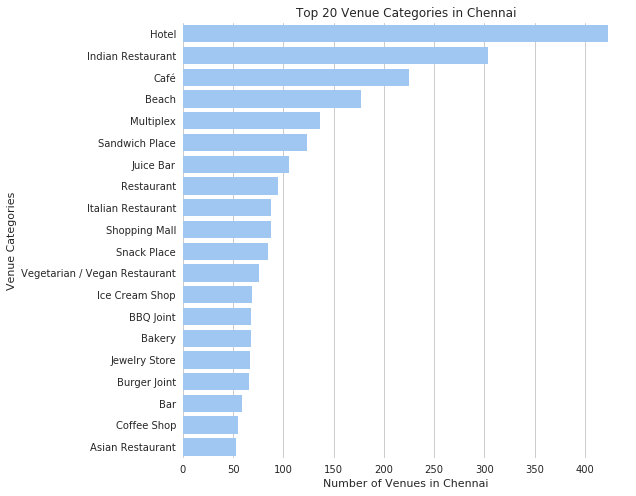

In [41]:
sns.set(style="whitegrid")

Chennai_group_by = pd.DataFrame(Chennai_venues['Venue Category'].value_counts()).reset_index()
Chennai_group_by = Chennai_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Chennai_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Chennai")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Chennai')

#### Getting bar chart which chows number of venues in Kolkata

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Kolkata')

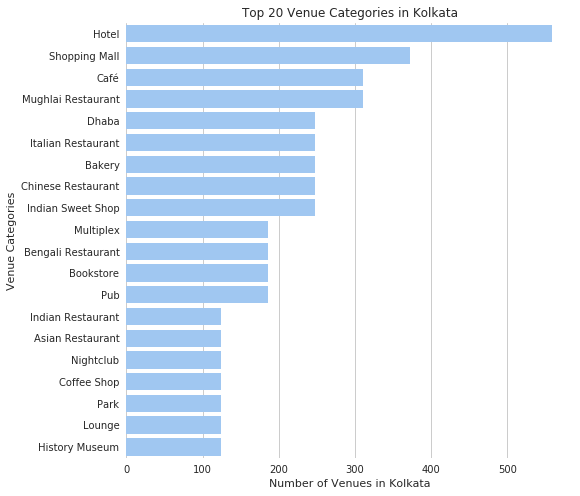

In [42]:
sns.set(style="whitegrid")

Kolkata_group_by = pd.DataFrame(Kolkata_venues['Venue Category'].value_counts()).reset_index()
Kolkata_group_by = Kolkata_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Kolkata_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Kolkata")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Kolkata')

#### Getting bar chart which chows number of venues in Mumbai

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Mumbai')

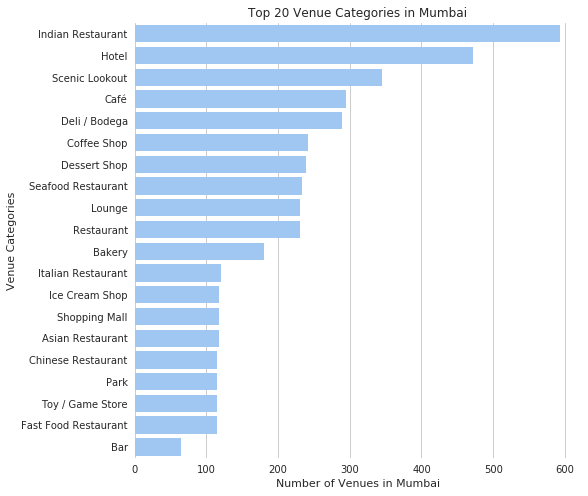

In [43]:
sns.set(style="whitegrid")

Mumbai_group_by = pd.DataFrame(Mumbai_venues['Venue Category'].value_counts()).reset_index()
Mumbai_group_by = Mumbai_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Mumbai_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Mumbai")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Mumbai')

#### Getting bar chart which chows number of venues in Pune

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Pune')

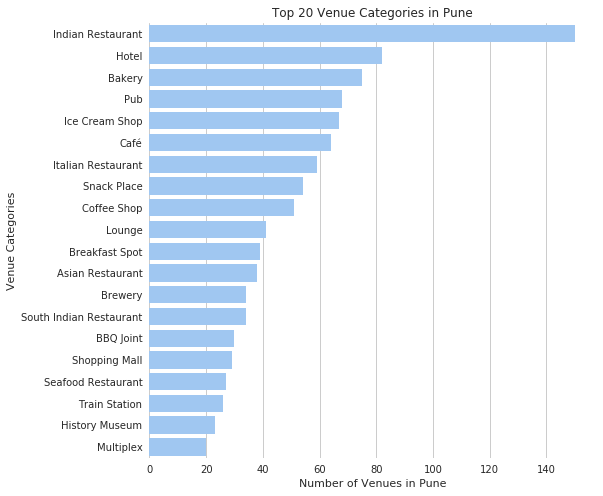

In [44]:
sns.set(style="whitegrid")

Pune_group_by = pd.DataFrame(Pune_venues['Venue Category'].value_counts()).reset_index()
Pune_group_by = Pune_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Pune_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Pune")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Pune')

#### Getting bar chart which chows number of venues in Jaipur

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Jaipur')

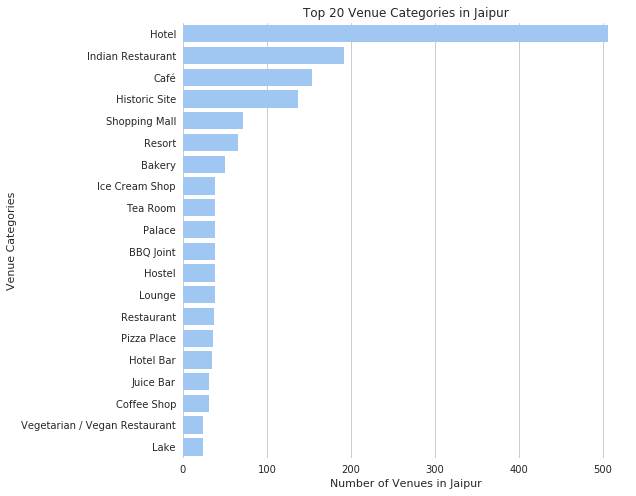

In [45]:
sns.set(style="whitegrid")

Jaipur_group_by = pd.DataFrame(Jaipur_venues['Venue Category'].value_counts()).reset_index()
Jaipur_group_by = Jaipur_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Jaipur_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Jaipur")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Jaipur')

#### Getting bar chart which chows number of venues in Hyderabad

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Hyderabad')

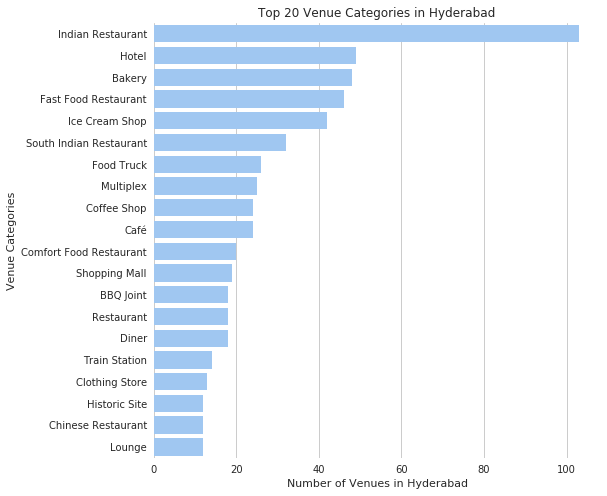

In [46]:
sns.set(style="whitegrid")

Hyderabad_group_by = pd.DataFrame(Hyderabad_venues['Venue Category'].value_counts()).reset_index()
Hyderabad_group_by = Hyderabad_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Hyderabad_group_by,label="Total", color="b")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues in Hyderabad")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Hyderabad')

#### Merging all the date we have in different cities

In [47]:
Merged_data = pd.concat([Ahemdabad_venues,Bangalore_venues,Chennai_venues,Delhi_venues,Hyderabad_venues,Jaipur_venues,Kolkata_venues,Mumbai_venues,Pune_venues,Surat_venues])
Merged_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
0,Adroda,22.8,72.45,Gulmohar Greens Golf & Country Club,22.962651,72.430077,Golf Course,Ahemdabad
1,Adroda,22.8,72.45,K K tea stall,23.030198,72.540535,Tea Room,Ahemdabad
2,Adroda,22.8,72.45,Zencafe,23.027230,72.521841,Café,Ahemdabad
3,Adroda,22.8,72.45,TOMATO'S,23.026693,72.557488,Mexican Restaurant,Ahemdabad
4,Adroda,22.8,72.45,Melt In,23.038354,72.512597,Dessert Shop,Ahemdabad


In [48]:
Merged_data.shape

(31144, 8)

#### Getting the number of venues in the cities

In [49]:
Merged_data_grouped = Merged_data.groupby('City').count().reset_index()
Merged_data_grouped

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahemdabad,3176,3176,3176,3176,3176,3176,3176
1,Bangalore,5228,5228,5228,5228,5228,5228,5228
2,Chennai,3400,3400,3400,3400,3400,3400,3400
3,Delhi,1100,1100,1100,1100,1100,1100,1100
4,Hyderabad,763,763,763,763,763,763,763
5,Jaipur,1948,1948,1948,1948,1948,1948,1948
6,Kolkata,6200,6200,6200,6200,6200,6200,6200
7,Mumbai,5900,5900,5900,5900,5900,5900,5900
8,Pune,1527,1527,1527,1527,1527,1527,1527
9,Surat,1902,1902,1902,1902,1902,1902,1902


#### Getting the cumulative bar graph of data in all these cities

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top 20 Venue Categories in Top 10 Indian Cities')

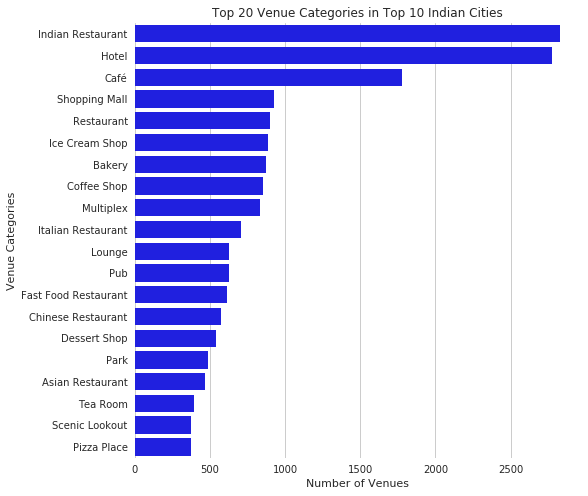

In [50]:
sns.set(style="whitegrid")

Merged_data_group_by = pd.DataFrame(Merged_data['Venue Category'].value_counts()).reset_index()
Merged_data_group_by = Merged_data_group_by.head(20)
f, ax = plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Venue Category", y="index", data=Merged_data_group_by,label="Total", color="blue")

# Add a legend and informative axis label
ax.set(ylabel="Venue Categories",xlabel="Number of Venues")
sns.despine(left=True, bottom=True)
plt.title('Top 20 Venue Categories in Top 10 Indian Cities')

In [51]:
print('There are {} uniques categories.'.format(len(Merged_data['Venue Category'].unique())))

There are 197 uniques categories.


#### Getting the one hot dataset of merged dataset

In [52]:
# one hot encoding
Merged_data_onehot = pd.get_dummies(Merged_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Merged_data_onehot['City'] = Merged_data['City'] 

# move neighborhood column to the first column
fixed_columns = [Merged_data_onehot.columns[-1]] + list(Merged_data_onehot.columns[:-1])
Merged_data_onehot = Merged_data_onehot[fixed_columns]

Merged_data_onehot.head()

,Zoo,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Town,Toy / Game Store,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Water Park,Whisky Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
Merged_data_onehot.shape

(31144, 197)

In [54]:
Merged_data_Grouped = Merged_data_onehot.groupby('City').mean().reset_index()
Merged_data_Grouped

,City,Zoo,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Town,Toy / Game Store,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Water Park,Whisky Bar,Women's Store
0,Ahemdabad,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.001259,0.00,0.009446,...,0.000000,0.000000,0.000000,0.004408,0.000000,0.000000,0.018892,0.000000,0.000000,0.00000
1,Bangalore,0.00153,0.00899,0.000000,0.008990,0.00153,0.000000,0.008607,0.00,0.001530,...,0.000000,0.000383,0.001530,0.003060,0.000000,0.000000,0.000000,0.000000,0.000000,0.00153
2,Chennai,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022353,0.000000,0.000000,0.00000
3,Delhi,0.00000,0.00000,0.000000,0.010000,0.00000,0.000000,0.020000,0.01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000909,0.000000,0.000000,0.008182,0.00000
4,Hyderabad,0.00000,0.00000,0.000000,0.007864,0.00000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.018349,0.000000,0.000000,0.007864,0.000000,0.000000,0.00000
5,Jaipur,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.009754,0.00,0.009754,...,0.000000,0.000000,0.000000,0.007187,0.009754,0.000000,0.012320,0.000000,0.000000,0.00000
6,Kolkata,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,Mumbai,0.00000,0.00000,0.000000,0.010508,0.00000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.019492,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00000
8,Pune,0.00000,0.00000,0.000000,0.007859,0.00000,0.000000,0.000000,0.00,0.000000,...,0.003929,0.000000,0.009823,0.017027,0.000000,0.000000,0.000000,0.003274,0.000000,0.00000
9,Surat,0.00000,0.00000,0.001052,0.000000,0.00000,0.016299,0.001052,0.00,0.000000,...,0.000000,0.000000,0.002629,0.022082,0.000000,0.000000,0.016299,0.000000,0.000000,0.00000


#### Getting top 10 venues frequency in all the cities

In [55]:
num_top_venues = 10

for hood in Merged_data_Grouped['City']:
    print("----"+hood+"----")
    temp = Merged_data_Grouped[Merged_data_Grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ahemdabad----
                  venue  freq
0     Indian Restaurant  0.12
1                  Café  0.11
2  Fast Food Restaurant  0.08
3                 Hotel  0.07
4            Restaurant  0.04
5              Tea Room  0.04
6             Multiplex  0.04
7           Coffee Shop  0.04
8           Pizza Place  0.03
9          Dessert Shop  0.03


----Bangalore----
               venue  freq
0  Indian Restaurant  0.11
1     Ice Cream Shop  0.08
2                Pub  0.05
3              Hotel  0.05
4             Lounge  0.03
5       Dessert Shop  0.03
6        Coffee Shop  0.03
7               Café  0.03
8            Brewery  0.03
9         Restaurant  0.02


----Chennai----
                venue  freq
0               Hotel  0.12
1   Indian Restaurant  0.09
2                Café  0.07
3               Beach  0.05
4           Multiplex  0.04
5      Sandwich Place  0.04
6  Italian Restaurant  0.03
7       Shopping Mall  0.03
8           Juice Bar  0.03
9          Restaurant  0.03


----Del

#### defining return_most_common_venues function

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Getting top 10 venues of the ciries

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = Merged_data_Grouped['City']

for ind in np.arange(Merged_data_Grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Merged_data_Grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahemdabad,Indian Restaurant,Café,Fast Food Restaurant,Hotel,Multiplex,Tea Room,Coffee Shop,Restaurant,Dessert Shop,Pizza Place
1,Bangalore,Indian Restaurant,Ice Cream Shop,Pub,Hotel,Lounge,Brewery,Dessert Shop,Café,Coffee Shop,Breakfast Spot
2,Chennai,Hotel,Indian Restaurant,Café,Beach,Multiplex,Sandwich Place,Juice Bar,Restaurant,Italian Restaurant,Shopping Mall
3,Delhi,Indian Restaurant,Hotel,Café,Restaurant,Shopping Mall,Italian Restaurant,Monument / Landmark,Coffee Shop,Bar,Market
4,Hyderabad,Indian Restaurant,Hotel,Bakery,Fast Food Restaurant,Ice Cream Shop,South Indian Restaurant,Food Truck,Multiplex,Coffee Shop,Café
5,Jaipur,Hotel,Indian Restaurant,Café,Historic Site,Shopping Mall,Resort,Bakery,Hostel,Palace,Ice Cream Shop
6,Kolkata,Hotel,Shopping Mall,Café,Mughlai Restaurant,Italian Restaurant,Dhaba,Indian Sweet Shop,Chinese Restaurant,Bakery,Bengali Restaurant
7,Mumbai,Indian Restaurant,Hotel,Scenic Lookout,Café,Deli / Bodega,Coffee Shop,Dessert Shop,Seafood Restaurant,Lounge,Restaurant
8,Pune,Indian Restaurant,Hotel,Bakery,Pub,Ice Cream Shop,Café,Italian Restaurant,Snack Place,Coffee Shop,Lounge
9,Surat,Indian Restaurant,Multiplex,Restaurant,Pizza Place,Tea Room,Chinese Restaurant,Café,Hotel,Ice Cream Shop,Fast Food Restaurant


#### Clustering with K-means angorithm

In [58]:
# set number of clusters
kclusters = 5

Merged_data_Grouped_clustering = Merged_data_Grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Merged_data_Grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 2, 2, 1, 0, 4, 1, 1, 3], dtype=int32)

In [59]:
kmeans.labels_.shape

(10,)

In [60]:
Merged_data.shape

(31144, 8)

#### Merging neighborhoods_venues_sorted with the df_data_city_names dataframe

In [61]:
City_Merged_data = df_data_city_names

# add clustering labels
City_Merged_data ['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
City_Merged_data  = City_Merged_data.join(neighborhoods_venues_sorted.set_index('City'), on='City')

City_Merged_data.head() # check the last columns!

,City,States,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mumbai,Maharashtra,19.228825,72.854118,3,Indian Restaurant,Hotel,Scenic Lookout,Café,Deli / Bodega,Coffee Shop,Dessert Shop,Seafood Restaurant,Lounge,Restaurant
1,Delhi,Delhi,28.644800,77.216721,1,Indian Restaurant,Hotel,Café,Restaurant,Shopping Mall,Italian Restaurant,Monument / Landmark,Coffee Shop,Bar,Market
2,Bangalore,Karnataka,12.972442,77.580643,2,Indian Restaurant,Ice Cream Shop,Pub,Hotel,Lounge,Brewery,Dessert Shop,Café,Coffee Shop,Breakfast Spot
3,Hyderabad,Telangana,17.387140,78.491684,2,Indian Restaurant,Hotel,Bakery,Fast Food Restaurant,Ice Cream Shop,South Indian Restaurant,Food Truck,Multiplex,Coffee Shop,Café
4,Ahmedabad,Gujarat,23.033863,72.585022,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
City_Merged_data.shape

(10, 15)

#### Getting the Indian map with 10 cities clustered

In [64]:
!pip install folium
import folium
latitude=28.644800
longitude = 77.216721
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(City_Merged_data['Latitude'], City_Merged_data['Longitude'], City_Merged_data['City'], City_Merged_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

    100% |████████████████████████████████| 92kB 8.6MB/s eta 0:00:01
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: MarkupSafe>=0.23 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jinja2->folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/

## Detailed Clustering

#### Cluster 1:

In [65]:
City_Merged_data.loc[City_Merged_data['Cluster Labels'] == 0, City_Merged_data.columns[[1] + list(range(5, City_Merged_data.shape[1]))]]

,States,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Tamil Nadu,Hotel,Indian Restaurant,Café,Beach,Multiplex,Sandwich Place,Juice Bar,Restaurant,Italian Restaurant,Shopping Mall


#### Cluster 2:

In [66]:
City_Merged_data.loc[City_Merged_data['Cluster Labels'] == 1, City_Merged_data.columns[[1] + list(range(5, City_Merged_data.shape[1]))]]

,States,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Delhi,Indian Restaurant,Hotel,Café,Restaurant,Shopping Mall,Italian Restaurant,Monument / Landmark,Coffee Shop,Bar,Market
4,Gujarat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Gujarat,Indian Restaurant,Multiplex,Restaurant,Pizza Place,Tea Room,Chinese Restaurant,Café,Hotel,Ice Cream Shop,Fast Food Restaurant
8,Maharashtra,Indian Restaurant,Hotel,Bakery,Pub,Ice Cream Shop,Café,Italian Restaurant,Snack Place,Coffee Shop,Lounge


#### Cluster 3:

In [67]:
City_Merged_data.loc[City_Merged_data['Cluster Labels'] == 2, City_Merged_data.columns[[1] + list(range(5, City_Merged_data.shape[1]))]]

,States,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Karnataka,Indian Restaurant,Ice Cream Shop,Pub,Hotel,Lounge,Brewery,Dessert Shop,Café,Coffee Shop,Breakfast Spot
3,Telangana,Indian Restaurant,Hotel,Bakery,Fast Food Restaurant,Ice Cream Shop,South Indian Restaurant,Food Truck,Multiplex,Coffee Shop,Café


#### Cluster 4:

In [68]:
City_Merged_data.loc[City_Merged_data['Cluster Labels'] == 3, City_Merged_data.columns[[1] + list(range(5, City_Merged_data.shape[1]))]]

,States,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Maharashtra,Indian Restaurant,Hotel,Scenic Lookout,Café,Deli / Bodega,Coffee Shop,Dessert Shop,Seafood Restaurant,Lounge,Restaurant
9,Rajasthan,Hotel,Indian Restaurant,Café,Historic Site,Shopping Mall,Resort,Bakery,Hostel,Palace,Ice Cream Shop


#### Cluster 5:

In [69]:
City_Merged_data.loc[City_Merged_data['Cluster Labels'] == 4, City_Merged_data.columns[[1] + list(range(5, City_Merged_data.shape[1]))]]

,States,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,West Bengal,Hotel,Shopping Mall,Café,Mughlai Restaurant,Italian Restaurant,Dhaba,Indian Sweet Shop,Chinese Restaurant,Bakery,Bengali Restaurant


<b>Discussion:</b>From the above-mentioned results we can understand the most of these cities has top dominated venues are Indian Restraint, Hotels, and shopping malls. After clustering we can see that Delhi, Ahmedabad, Surat and Pune have similar venues, Jaipur and Mumbai have similar venues in to categories, Bangalore and Hyderabad have similar top venues, but Chennai and Kolkata are all different from all other cities. This project would be very helpful to have business decisions and would be good choice for investors as well.  



<b>Conclusion:</b>In project we have discussed all the detailed insights of important different venues spread across different cities in India. We have found different clusters of Indian cities using machine learning algorithm. We have got to know about top venues in different cities. This analysis gives better insights to all in very simple manner.  